# Data Exploration

In [1]:
import pandas as pd
import numpy as np

In [2]:
cars_prices = pd.read_csv("cars_price_data.csv")

In [3]:
cars_prices.shape

(205, 26)

In [4]:
cars_prices.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


# Remove the missing values

As we can see from the data, there are some missing values that are coded as '?'. We will Remove rows with missing values

In [5]:
    cols = ['price', 'bore', 'stroke', 
          'horsepower', 'peak-rpm']
    for column in cols:
        cars_prices.loc[cars_prices[column] == '?', column] = np.nan
    cars_prices.dropna(axis = 0, inplace = True)

In [6]:
cars_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 204
Data columns (total 26 columns):
symboling            195 non-null int64
normalized-losses    195 non-null object
make                 195 non-null object
fuel-type            195 non-null object
aspiration           195 non-null object
num-of-doors         195 non-null object
body-style           195 non-null object
drive-wheels         195 non-null object
engine-location      195 non-null object
wheel-base           195 non-null float64
length               195 non-null float64
width                195 non-null float64
height               195 non-null float64
curb-weight          195 non-null int64
engine-type          195 non-null object
num-of-cylinders     195 non-null object
engine-size          195 non-null int64
fuel-system          195 non-null object
bore                 195 non-null object
stroke               195 non-null object
compression-ratio    195 non-null float64
horsepower           195 non-nul

So we can see here after removing the missing values, we have 195 rows instead of 205

Convert columns to numeric values

In [7]:
for column in cols:
    cars_prices[column] = pd.to_numeric(cars_prices[column])

In [8]:
cars_prices.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.794872,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385
std,1.230612,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000
50%,1.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,2.000000,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


# Getting a snense of the data through the describe function

We can see for the table above, the mean length is 174 and the range is from 141 to 208 so this gives an idea that cars are not super short and not extremely long and if we look at the 50% (which is the median = 173 inches) is almost the same as the mean, so the distribution is fairly symmetric. If we take a look at the price column, we can see a wide std of 8000 and there is a high range of prices that goes from 5000 to 45000, Also the median is 10000 whereas the mean is 13000, so in terms of exploring the data we know that the price is highly skewed.      

# Exploring data through charts







### Scatter plot

Scatter plots show how much one variable is affected by another. The relationship between two variables is called their correlation .

First we have to import Matplotlib, Matplotlib is the base of most Python plotting packages. Some basic understanding of Matplotlib will help you achieve better control of your graphics.

Text(0, 0.5, 'car Price')

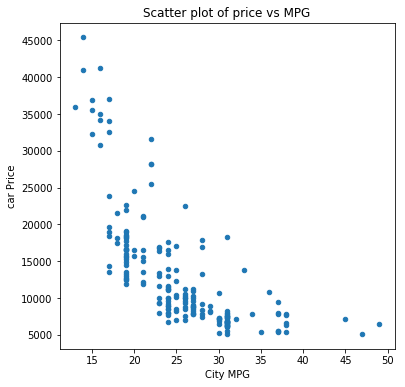

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline 
# First define plot area
fig = plt.figure(figsize=(6, 6)) 
# define axis 
ax = fig.gca()                   
cars_prices.plot(kind = 'scatter', x = 'city-mpg', y = 'price', ax = ax)
# Give the plot a main title
ax.set_title('Scatter plot of price vs MPG')
# Set text for the x axis
ax.set_xlabel('City MPG')
# Set text for y axis
ax.set_ylabel('car Price')

In the plot above, we can see that the most costly cars have the lowest fuel efficiency, whereas relatively inexpensive cars are also more economical to drive.



# Bar plots

Bar plots are used to display the counts of unique values of a categorical variable. The height of the bar represents the count for each unique category of the variable.
The first step in making a bar plot is to compute the counts. Pandas has a value_counts method. The code below uses this method to create a new data frame containing the counts by make of the car.

In [10]:
 # find the counts for each unique category
counts = cars_prices['make'].value_counts()
counts

toyota           32
nissan           18
mazda            13
honda            13
mitsubishi       13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
saab              6
audi              6
porsche           4
chevrolet         3
jaguar            3
alfa-romero       3
isuzu             2
mercury           1
Name: make, dtype: int64

Text(0, 0.5, 'Number of cars')

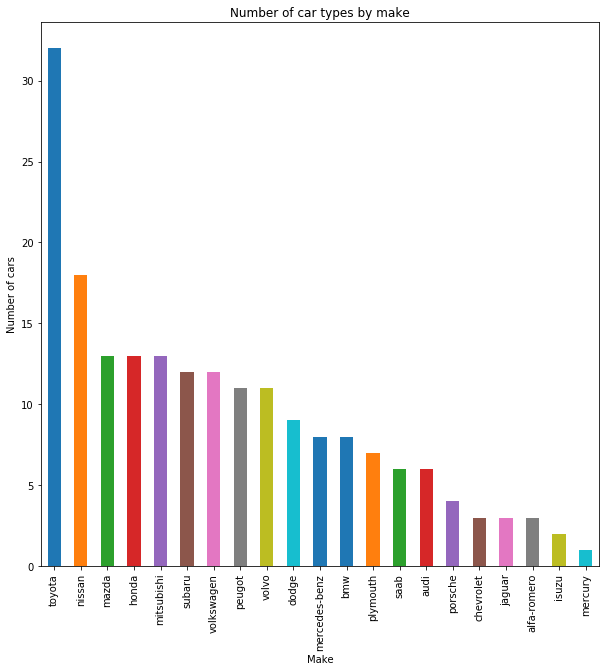

In [11]:
# define plot area
fig = plt.figure(figsize=(10,10)) # define plot area
# define axis
ax = fig.gca()
# Use the plot.bar method on the counts data frame
counts.plot.bar(ax = ax)
# Give the plot a main title
ax.set_title('Number of car types by make')
# Set text for the x axis
ax.set_xlabel('Make') 
# Set text for y axis
ax.set_ylabel('Number of cars')

The bar plot clearly shows which car manufacturers have the largest and lowest number of models. Toyota has the highest number of models while mercury has the lowest number of models

# Histograms

Histograms are related to bar plots. Histograms are used for numeric variables. Whereas, a bar plot shows the counts of unique categories, a histogram shows the number of data with values within a bin. The bins divide the values of the variable into equal segments. The vertical axis of the histogram shows the count of data values within each bin.

The code below follows our same basic recipe to create a histogram of engine-size. Notice however, that the column of the data frame we wish to plot is specified by name as cars_prices['engine-size'].

Text(0, 0.5, 'Number of cars')

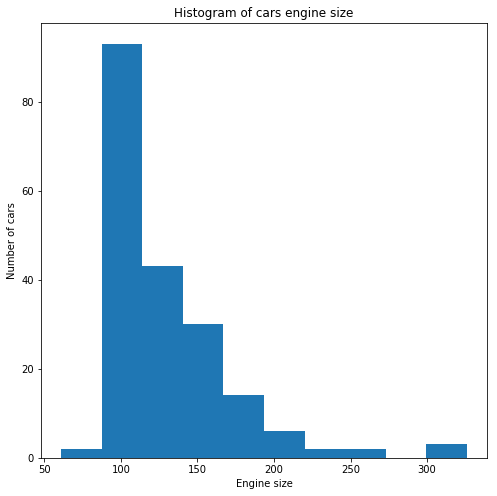

In [12]:
# define plot area
fig = plt.figure(figsize=(8,8)) 
# define axis
ax = fig.gca() 
# Use the plot.hist method on subset of the data frame
cars_prices['engine-size'].plot.hist(ax = ax) 
# Give the plot a main title
ax.set_title('Histogram of cars engine size') 
# Set text for the x axis
ax.set_xlabel('Engine size') 
# Set text for y axis
ax.set_ylabel('Number of cars')

As we can see from this Histogram that the distribution is highly skewed which shows the car manufacturers in our dataset tended to have higher number of cars with small Engine size

Text(0, 0.5, 'Number of cars')

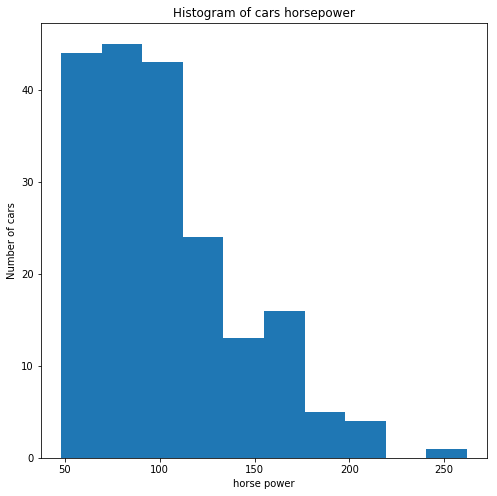

In [13]:
# define plot area
fig = plt.figure(figsize=(8,8)) 
# define axis
ax = fig.gca() 
# Use the plot.hist method on subset of the data frame
cars_prices['horsepower'].plot.hist(ax = ax) 
# Give the plot a main title
ax.set_title('Histogram of cars horsepower') 
# Set text for the x axis
ax.set_xlabel('horse power') 
# Set text for y axis
ax.set_ylabel('Number of cars')

We can see from the Histogram that most cars lie in the 50-150 horse power range with some few cars that has 200 or more horse power which makes sense and we can see how the visualization can tell us a story about our dataset

# Box plots

Box plots are another way to visualize the distribution of data values. In this respect, box plots are comparable to histograms, but are quite different in presentation.

In a typical box plot, the top of the rectangle indicates the third quartile, a horizontal line near the middle of the rectangle indicates the median, and the bottom of the rectangle indicates the first quartile. A vertical line extends from the top of the rectangle to indicate the maximum value, and another vertical line extends from the bottom of the rectangle to indicate the minimum value. 

The code in the cell below generally follows the recipe we have been using. The data frame is subsetted to two columns. One column contains the numeric values to plot and the other column is the group by variable. In this case, the group by variable is specified with the by = 'fuel-type' argument.In this way, the box plot allows you to display two dimensions of your data set.

Text(0, 0.5, 'Engine size')

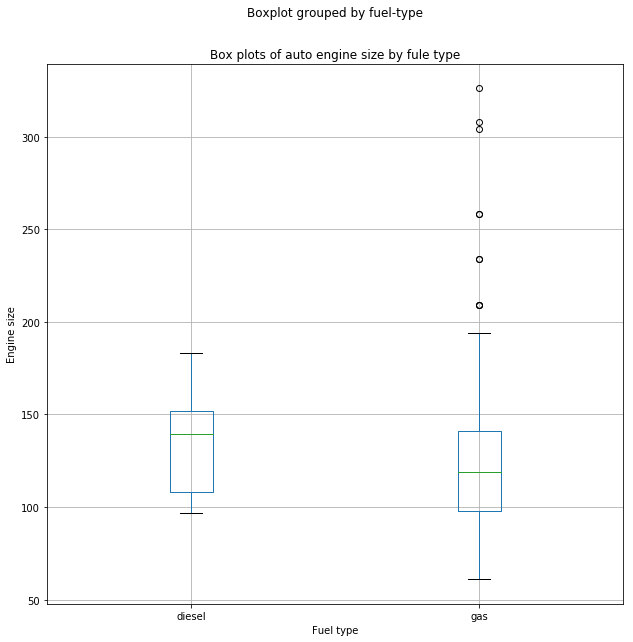

In [14]:
# define plot area
fig = plt.figure(figsize=(10,10)) 
# define axis 
ax = fig.gca() 
# Use the plot.bar method on the new data frame
cars_prices[['engine-size','fuel-type']].boxplot(by = 'fuel-type', ax = ax) 
# Give the plot a main title
ax.set_title('Box plots of auto engine size by fule type') 
# Set text for the x axis
ax.set_xlabel('Fuel type')
# Set text for y axis
ax.set_ylabel('Engine size')

From the boxplot we can see that the median engine size (the green bar) for gas cars is noticeably lower than for diesel cars. However, the range of engine sizes for gas cars is greater, including a few outliers. It is likely, these are the outliers we saw in the histogram. Also the max engine size for a diesel car is around 180 whereas for a gas car you get somewhere around 370. Boxplot can give you lots of very sightful observations

## Now we will talk about seaborn

In [15]:
import seaborn as sns


##### We control the properties of a Seaborn plot by specifing axes. The code in the cell below extends our simple recipe for Seaborn plots:

    Define a figure.
    Define one or more axes on the figure.
    Set a style for the plot grid.
    Define the plot type and columns to be plotted.
    Use methods on the axes to control attributes like titles and axis labels.
##### We will start with Kernel Destiny Estimation (KDE) plot

C:\anaconda\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Density')

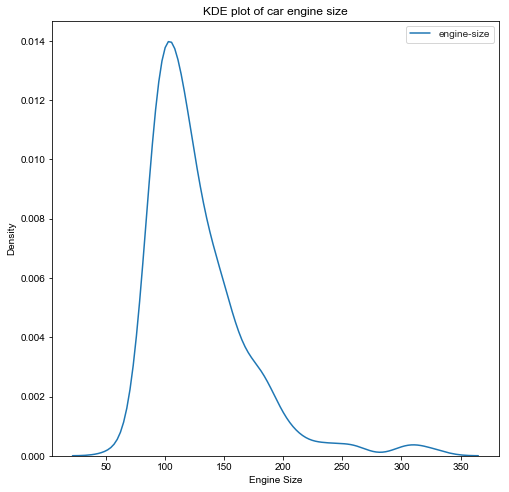

In [16]:
# define plot area
fig = plt.figure(figsize=(8,8))
 # define axis
ax = fig.gca() 
sns.set_style("whitegrid")
sns.kdeplot(cars_prices['engine-size'], ax = ax)
# Give the plot a main title
ax.set_title('KDE plot of car engine size') 
# Set text for the x axis
ax.set_xlabel('Engine Size') 
# Set text for y axis
ax.set_ylabel('Density')

We can observe that the KDE plot results are similar to what we observed with the histogram of engine size. Engine size is skewed toward the small size, and there are outliers of a few cars with large engines clearly visible.

### Two Dimensional KDE plot

The code in the cell below creates a two dimensional kde plot of price and engine size following the same recipe. Notice that all we needed to do was to specify another data frame column for the second dimension.

C:\anaconda\anaconda\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


Text(0, 0.5, 'Price')

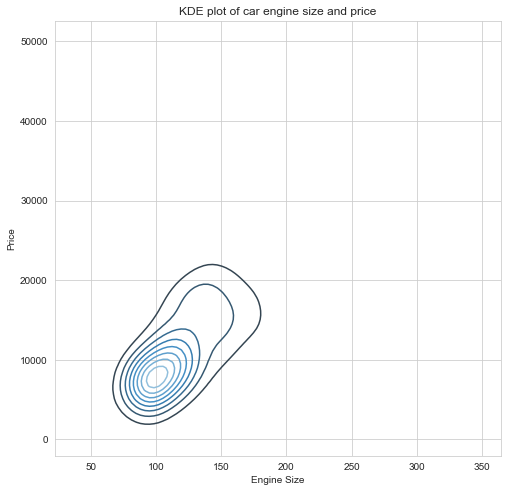

In [17]:
# define plot area
fig = plt.figure(figsize=(8,8))
# define axis 
ax = fig.gca() 
sns.set_style("whitegrid")
sns.kdeplot(cars_prices[['engine-size', 'price']], ax = ax, cmap="Blues_d")
# Give the plot a main title
ax.set_title('KDE plot of car engine size and price') 
# Set text for the x axis
ax.set_xlabel('Engine Size')
# Set text for y axis
ax.set_ylabel('Price')

We can clearly see that there is a single strong mode for both auto price and engine size. There is a skew of both variables toward lower cost cars with smaller engines.

# Violin plots

Now, we will use Seaborn to create a violin plot. A violin plot combines attributes of boxplots and a kernel density estimation plot. Like a box plot, the violin plots can be stacked, with a group by operation. Additionally, the violin plot provides a kernel density estimate for each group. As with the box plot, violin plots allow you to display two dimensions of your data set.

The code in the cell below follows the recipe we have laid out for Seaborn plotting. The sns.violinplot method has more arguments than the kdeplot method.

    The columns used for the plot are set with the x and y arguments.
    The x column is the group by variable.
    The data argument specifies a pandas data frame or a numpy array.

Text(0, 0.5, 'Engine size')

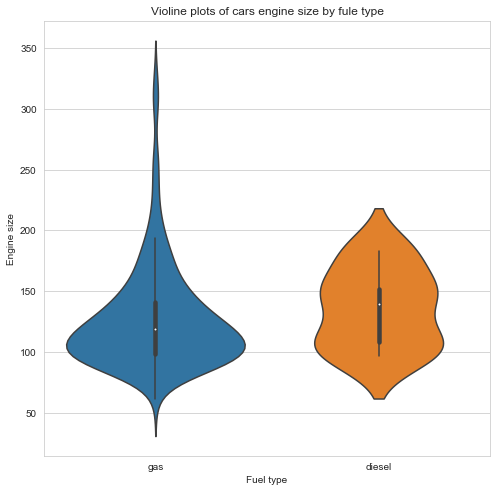

In [18]:
 # define plot area
fig = plt.figure(figsize=(8,8))
# define axis 
ax = fig.gca() 
sns.set_style("whitegrid")
sns.violinplot(x = 'fuel-type', y = 'engine-size', data = cars_prices, ax = ax)
# Give the plot a main title
ax.set_title('Violine plots of cars engine size by fule type') 
# Set text for the x axis
ax.set_xlabel('Fuel type') 
# Set text for y axis
ax.set_ylabel('Engine size')

##### Violin plots have many of the same summary statistics as box plots:

    The white dot represents the median.
    The thick gray bar in the center represents the interquartile range.
    The thin gray line represents the 95% confidence interval.


The differences in the distribution of engine sizes between gas and diesel cars are clearly visible in the violin plots. We can confirm that the engine size of gas cars is skewed to the small size, but with a wider overall range. There are some gas cars with very small engine sizes and a number of autos that appear as outliers with large engines. The distibution of diesel engine sizes is more uniform.

## Viewing multiple dimensions with aesthetics

We have now explored some basic plot types. We have only looked at plots for one or two columns of data. Thus, we have been limited to visualization of only two dimensions of our data set.

Now, we will use plot aesthetics to view additional dimensions of the data set. These asthetics allow you to project additonal dimensions onto a two dimensional plot surface. Additionally, carefull choice of plot aesthetics can highlight certain aspects of a data set you are exploring.

There are many possible aesthetics one can use for visualization. Specific examples we will work with here include:

    Color
    Transparency
    Size
    Marker shape
    Aesthetics specific to plot type

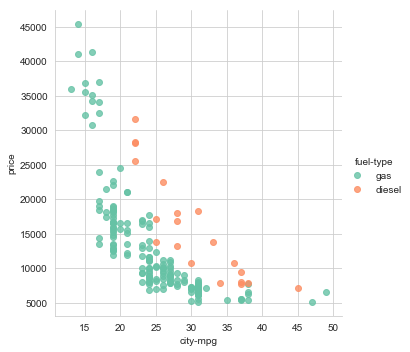

In [19]:
sns.lmplot(x = 'city-mpg', y = 'price', 
           data = cars_prices, 
           hue = "fuel-type", 
           palette="Set2", fit_reg = False)


In the above plot we can see that a diesel car is generally more costly at a given fuel efficiency. We can also see that all of the least efficient and most expensive cars have gas engines.

## Marker shapes

Marker shape can be used to project an additonal dimension onto a two dimensional plotting surface. Typically, different marker shapes are used to indicate the categories of a categorical variable

The code in the cell below uses different marker shapes to indicate standard and turbo aspiration cars.

C:\anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


'Done'

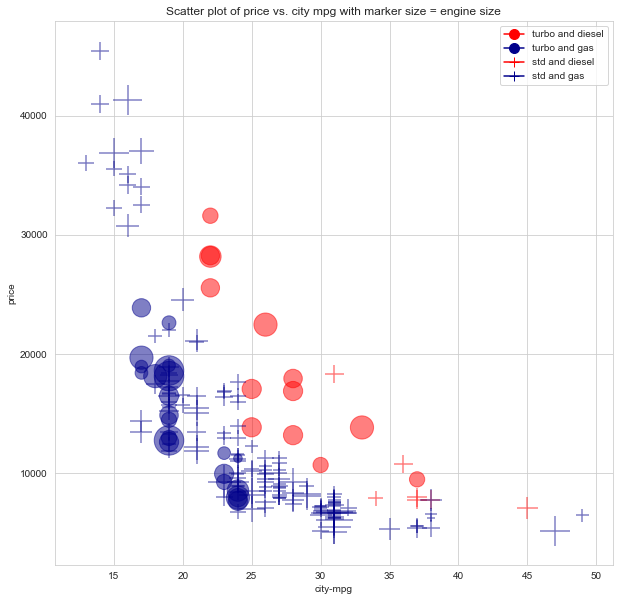

In [20]:
def auto_shape(df):
    import matplotlib.pyplot as plt
    import matplotlib.lines as mlines
    aspiration = ['turbo', 'turbo', 'std', 'std']
    fuel = ['diesel', 'gas', 'diesel', 'gas']
    mrks = ['o', 'o', '+', '+']
    cols = ['Red', 'DarkBlue', 'Red', 'DarkBlue']
    ldg = []
    fig = plt.figure(figsize=(10, 10))
    ax = fig.gca()
    for asp, fl, mk, cl in zip(aspiration, fuel, mrks, cols):
        temp = df.ix[(df['aspiration'] == asp) & (df['fuel-type'] == fl)]       
        if temp.shape[0] > 0:                    
            temp.plot(kind = 'scatter', x = 'city-mpg', y = 'price' , ax = ax, color = cl, marker = mk,
                       s= .02 * df['engine-size'] * df['engine-size'], alpha = 0.5)    
        ldg.append(mlines.Line2D([], [], color=cl, marker=mk, markersize=10, 
                                 label=(asp + ' and ' + fl)))    
    ax.set_title('Scatter plot of price vs. city mpg with marker size = engine size')
    plt.legend(handles=ldg)
    return'Done'
auto_shape(cars_prices)

##### The above plot projects five dimensions onto the two dimensional plot surface: price, city mpg, engine size, aspiration type, and fuel type. It takes some time and effort to fully understand all of the information provided.

Some conclusions we can draw from the chart above include:

    The most expensive cars have larger, standard aspiration, gas engines.
    Most diesel cars use tubo aspiration and these tend to be more expensive.
    Turbo aspiration gas engine cars are in the low range of fuel efficiency, but in the middle of the price range.
    Some lower cost cars have large gas engines.

## Plot specific aesthetics - Histogram bins

We have used some fairly general aesthetics to bring forth relationships in our dataset. We will now look at some additional aesthetics which tend to be more chart type specific.

As a first example, we will examine the effect of changing the number of bins in a histogram. The code below plots the histogram of engine size using different numbers of bins; the default of 10 bins and 40 bins. This is also the first time we have placed multiple sets of axes on the same figure. The first line of code defines two subplots in one row on the figure.

Text(0, 0.5, 'Number of cars')

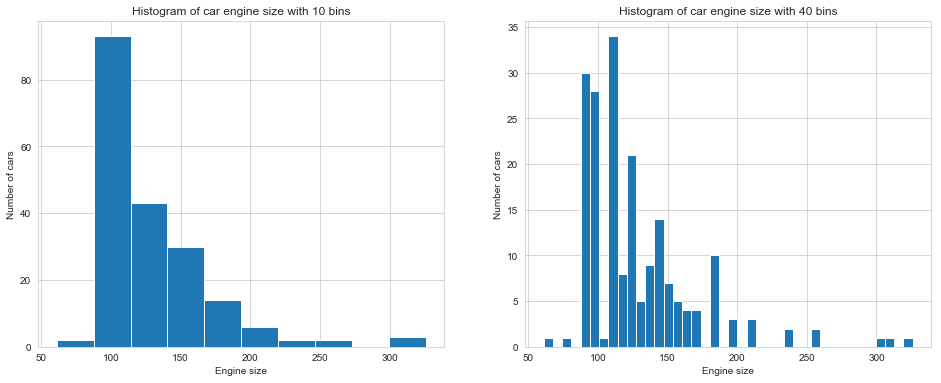

In [21]:

fig, ax = plt.subplots(1, 2, figsize = (16, 6))
cars_prices['engine-size'].plot.hist(ax = ax[0]) 
# Give the plot a main title
ax[0].set_title('Histogram of car engine size with 10 bins')
# Set text for the x axis
ax[0].set_xlabel('Engine size') 
# Set text for y axis
ax[0].set_ylabel('Number of cars')
cars_prices['engine-size'].plot.hist(ax = ax[1], bins = 40) 
ax[1].set_title('Histogram of car engine size with 40 bins') 
ax[1].set_xlabel('Engine size') 
ax[1].set_ylabel('Number of cars')

### Plot specific aesthetics - Split violin plot

The violin plots supported in Seaborn, allow you to group the data by a binary categorical variable. In the code shown below, the hue argument is used to show the KDEs of standard and turbo aspiration cars, for grouped by the x axis variable of fuel type. The resulting plot shows three dimensions: price, fuel type and aspiration.

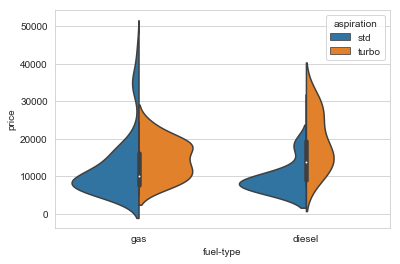

In [22]:
import seaborn as sns
sns.set_style("whitegrid")
sns.violinplot(data = cars_prices, x = 'fuel-type', y = 'price', hue="aspiration",  split=True)

From the plot above, we can see that standard aspiration gas engine cars have the widest range of prices. We can also see that diesel cars tend to be more expensive. Finally both gas and diesel engine cars with standard aspiration have prices skewed to the lower side.

## Plot specific aesthetics - Box plots

Using Seaborn we can add group data for box plots by hue, much as we just did with violin plots. The code below uses the hue aesthetic to group the cars by body style. As before, the x axis groups the cars by fuel type.

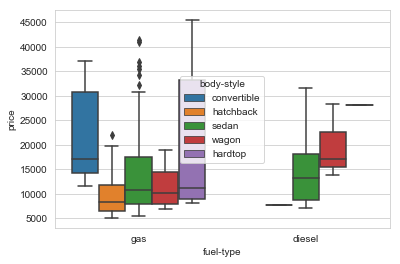

In [23]:
sns.set_style("whitegrid")
sns.boxplot(data = cars_prices, x = 'fuel-type', y = 'price', hue="body-style")

## Adding the color asthetic has highlighted some complex relationships in our data set. 

#### Examine the plot, noticing several interesting relationships including:

    Gas hardtops have the widest range of price, followed by gas convertibles.
    There are few available body styles for diesel cars.
    Gas hatchbacks are generally the lowest cost cars, follow by gas and diesel sedans.
    There are two diesel cars with unique body types. A different plot or a simple subsetting of the data is required to indentify these body types.